In [52]:
#留下欄位 39

import pandas as pd

file_path = 'application_train.csv'
data = pd.read_csv(file_path)

# List of columns to drop
columns_to_drop = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
    'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
    'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
    'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'
]

data = data.drop(columns=columns_to_drop)

# Display the remaining columns and their count
remaining_columns = data.columns
num_remaining_columns = len(remaining_columns)

print("Remaining Columns:")
print(remaining_columns)
print(f"\nNumber of Remaining Columns: {num_remaining_columns}")

Remaining Columns:
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

Number of Remaining Columns: 39


In [56]:
#Question to teacher - 365243 單獨分析(意義?) 直接drop掉?(但占比多) 
#參考 <3>Target V.S DAYS_EMPLOYED工作年資
#異常值的貸款用户發生逾期的機率很低，這是個表縣能力很好的365243

import pandas as pd

# Read the CSV file into a DataFrame
file_path = 'application_train.csv'
data = pd.read_csv(file_path)

# Extract the 'DAYS_EMPLOYED' column
days_employed_column = data['DAYS_EMPLOYED']

# Get the number of data points (rows) in the column
num_data_points = days_employed_column.shape[0]

# Count the occurrences of the value 365243
num_invalid_values = (days_employed_column == 365243).sum()

# Calculate the percentage of occurrences
percentage_invalid = (num_invalid_values / num_data_points) * 100

# Display the results
print(f"Number of data points in 'DAYS_EMPLOYED' column: {num_data_points}")
print(f"Number of occurrences of 365243 in 'DAYS_EMPLOYED' column: {num_invalid_values}")
print(f"Percentage of occurrences of 365243: {percentage_invalid:.2f}%")

Number of data points in 'DAYS_EMPLOYED' column: 307511
Number of occurrences of 365243 in 'DAYS_EMPLOYED' column: 55374
Percentage of occurrences of 365243: 18.01%


# Train Overlook

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

In [2]:
application_train=pd.read_csv("application_train.csv")

In [3]:
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [4]:
app_tr_apply = application_train.apply(lambda x:x.unique().shape[0],axis=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(app_tr_apply)

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13673
AMT_GOODS_PRICE                   1003
NAME_TYPE_SUITE                      8
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         63
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

# Detail of Column

C:\Users\tiffa\AppData\Local\Temp\ipykernel_1336\4219326234.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




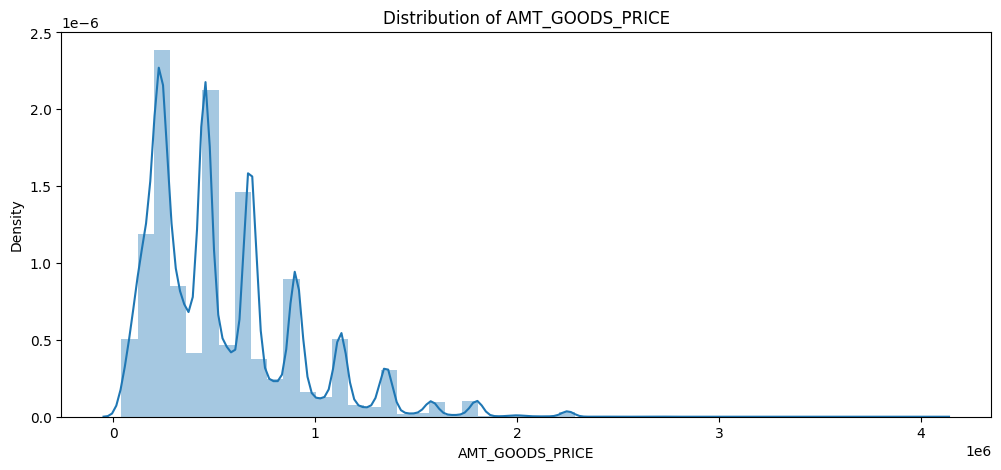

In [12]:
#AMT_GOODS_PRICE消費貸款 給貸款商品的價格
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna())

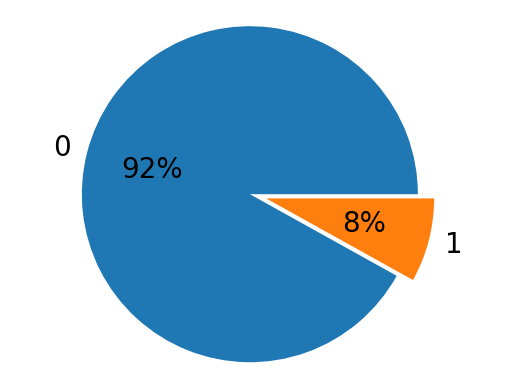

In [13]:
#TARGET 違約的1占8%
temp = application_train["TARGET"].value_counts()
#df = pd.DataFrame({'labels': temp.index,
#                   'values': temp.values
#                  })
#df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

explode = (0,0.1)
plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'}, explode=explode)
plt.axis('equal')
plt.show()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


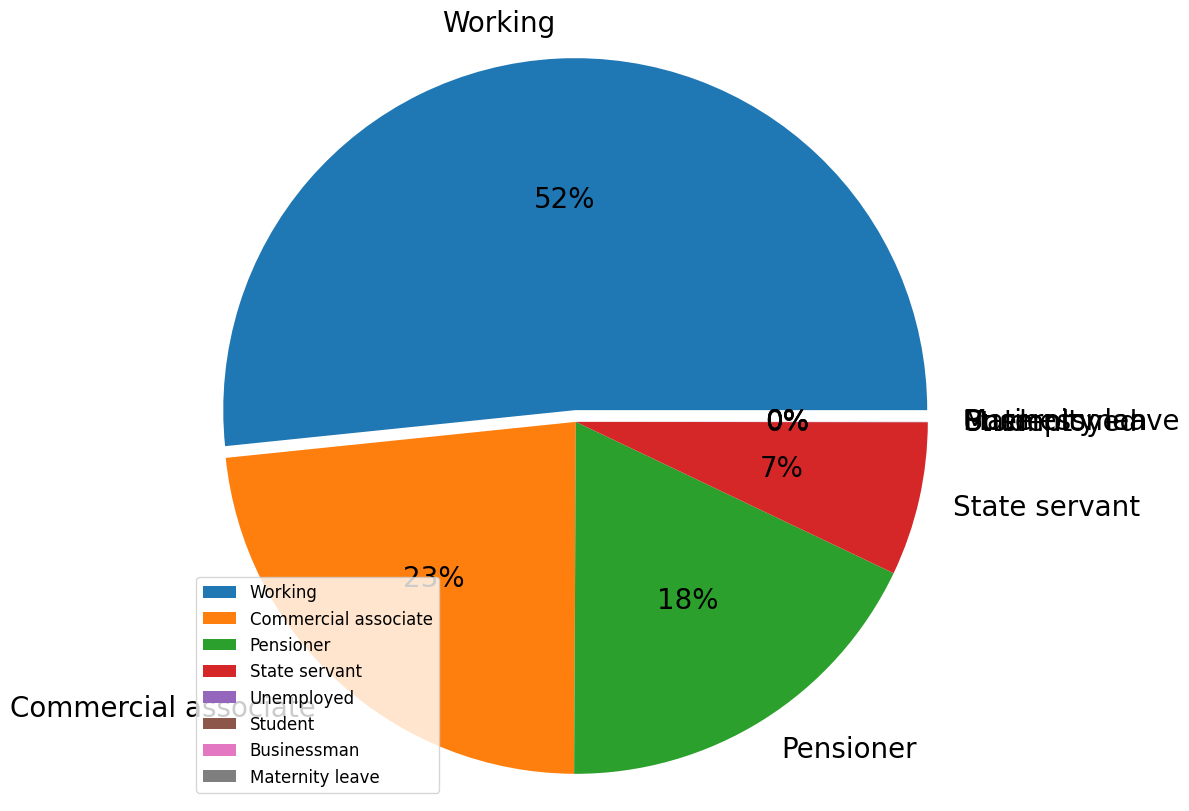

In [14]:
#NAME_INCOME_TYPE 客戶收入類型
temp = application_train["NAME_INCOME_TYPE"].value_counts()
#df = pd.DataFrame({'labels': temp.index,
#                   'values': temp.values
#                  })
#df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)
print(temp)
plt.figure(figsize=(10,10)) 
explode = (0.5,0,0,0,0,0,0,0)
plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'}, explode=explode, radius = 15)
plt.axis('equal')
plt.legend(loc = "best",fontsize="large")
plt.show()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


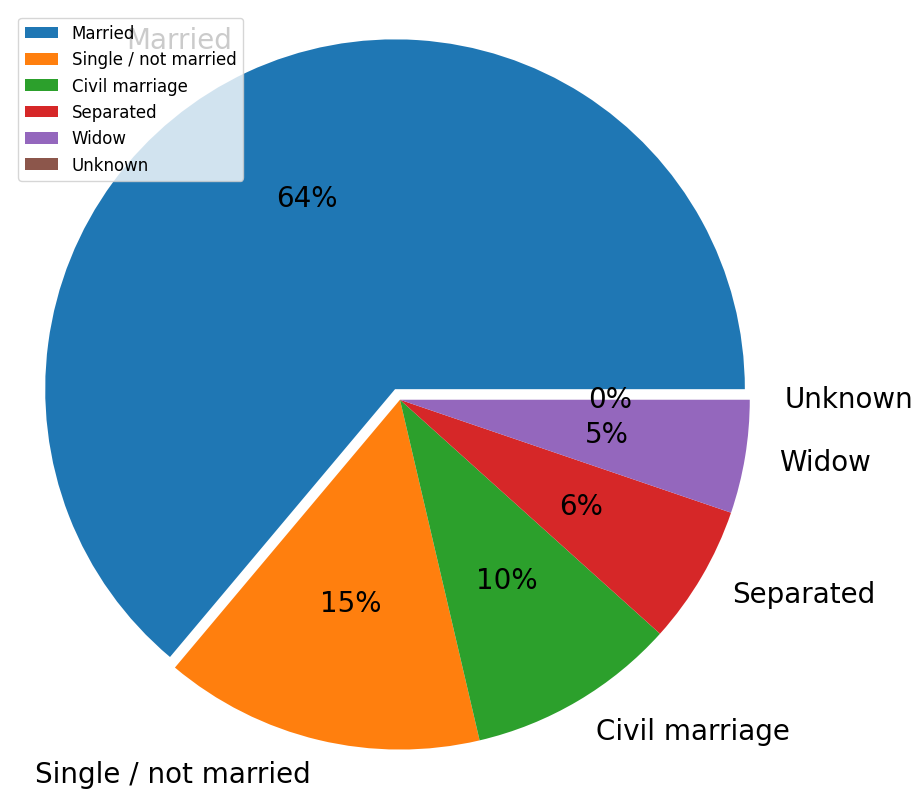

In [15]:
#NAME_FAMILY_STATUS 客戶家庭狀況
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
#df = pd.DataFrame({'labels': temp.index,
#                  'values': temp.values
#                  })
#df.iplot(kind='pie',labels='labels',values='values', title='Family Status of Applicant\'s', hole = 0.5)
print(temp)
plt.figure(figsize=(10,10)) 
explode = (0.5,0,0,0,0,0)
plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'}, explode=explode, radius = 15)
#plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'})
plt.axis('equal')
plt.legend(loc = "best",fontsize="large")

plt.show()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


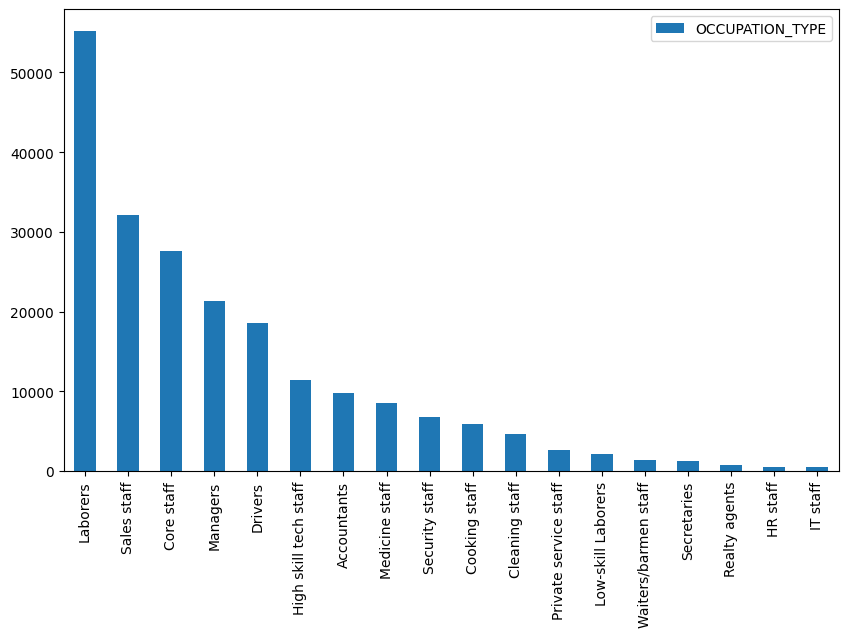

In [16]:
#OCCUPATION_TYPE 職業類型
temp = application_train["OCCUPATION_TYPE"].value_counts()
print(temp)
plt.figure(figsize=(10,6)) 
temp.plot(kind='bar')
plt.legend(loc = "best")

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


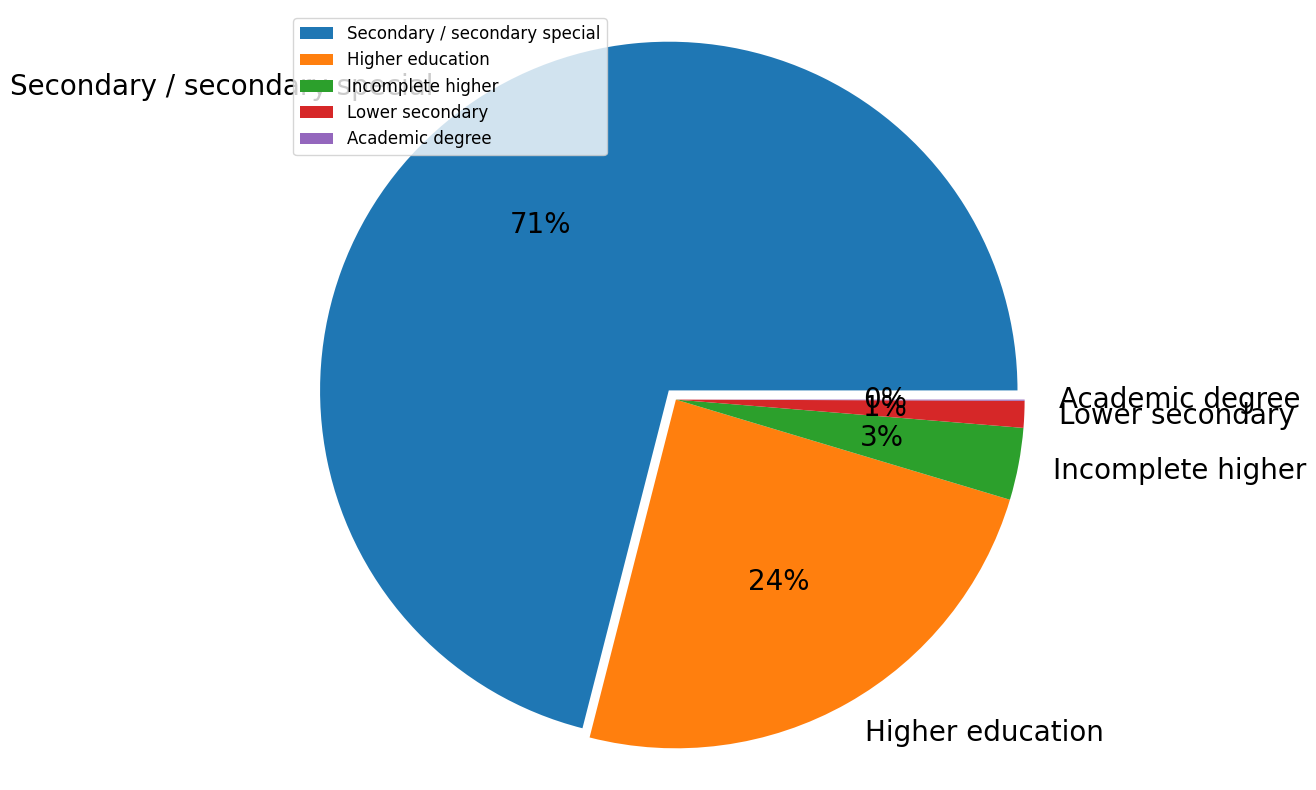

In [17]:
#NAME_EDUCATION_TYPE 最高學歷
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
#df = pd.DataFrame({'labels': temp.index,
#                   'values': temp.values
#                  })
#df.iplot(kind='pie',labels='labels',values='values', title='Education of Applicant\'s', hole = 0.5)
print(temp)
plt.figure(figsize=(10,10)) 
explode = (0.5,0,0,0,0)
plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'}, explode=explode, radius = 15)
#plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'})
plt.axis('equal')
plt.legend(loc = "best",fontsize="large")

plt.show()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


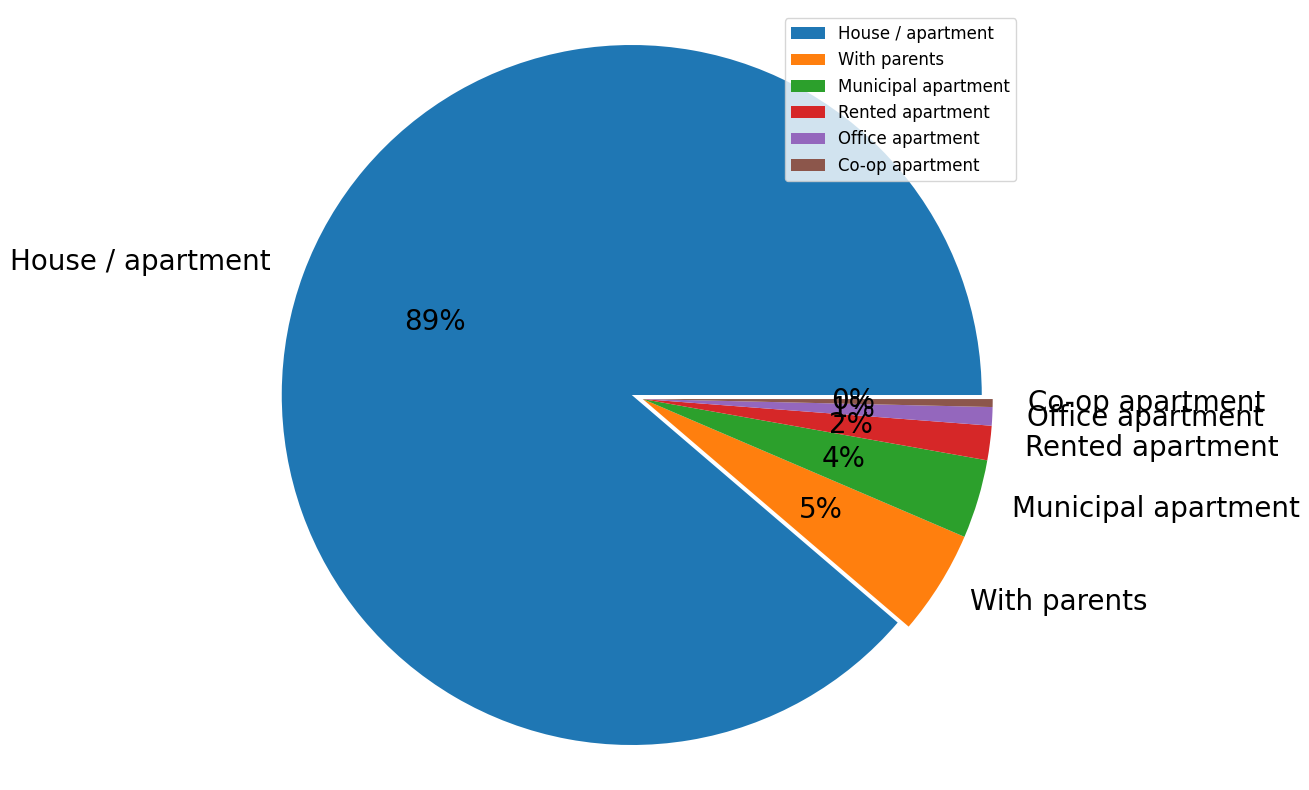

In [18]:
#NAME_HOUSING_TYPE 房子是租屋?還是跟父母住?
temp = application_train["NAME_HOUSING_TYPE"].value_counts()
print(temp)
plt.figure(figsize=(10,10)) 
explode = (0.5,0,0,0,0,0)
plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'}, explode=explode, radius = 15)
#plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'})
plt.axis('equal')
plt.legend(loc = "best",fontsize="large")

plt.show()

In [19]:
#CODE_GENDER 男 女 數量
temp = application_train["CODE_GENDER"].value_counts()
print(temp)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["CODE_GENDER"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["CODE_GENDER"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "For which gender of house higher applicant's applied for loan in terms of loan is repayed or not in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='types of gender',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [20]:
#FLAG_OWN_CAR 有車?
temp = application_train["FLAG_OWN_CAR"].value_counts()
print(temp)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["FLAG_OWN_CAR"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["FLAG_OWN_CAR"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "For which own car of house higher applicant's applied for loan in terms of loan is repayed or not in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='types of own car',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


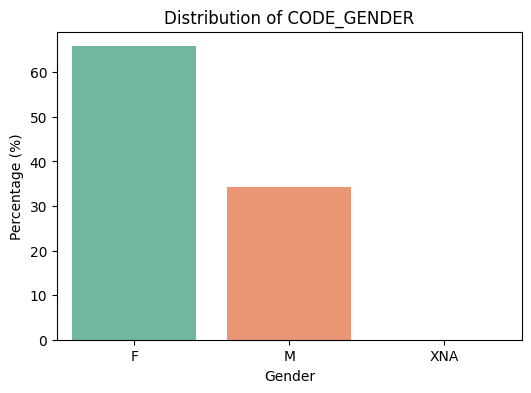

In [28]:
#CODE_GENDER 借款女生比較多
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("application_train.csv")

# Calculate the value counts and percentages
gender_counts = data["CODE_GENDER"].value_counts()
gender_percentages = gender_counts / len(data) * 100

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_percentages, palette="Set2")
plt.title("Distribution of CODE_GENDER")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.show()

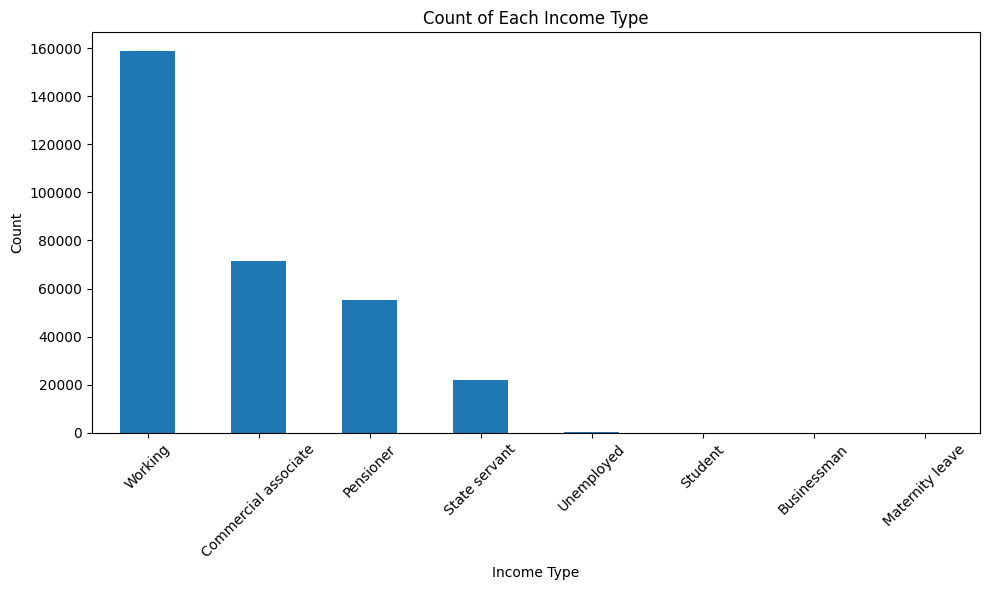

In [34]:
#NAME_INCOME_TYPE 客戶收入類型
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'application_train.csv'
data = pd.read_csv(file_path)

# Extract the 'NAME_INCOME_TYPE' column data
name_income_type = data['NAME_INCOME_TYPE']

# Count the occurrences of each unique value
income_type_counts = name_income_type.value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
income_type_counts.plot(kind='bar')
plt.title('Count of Each Income Type')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

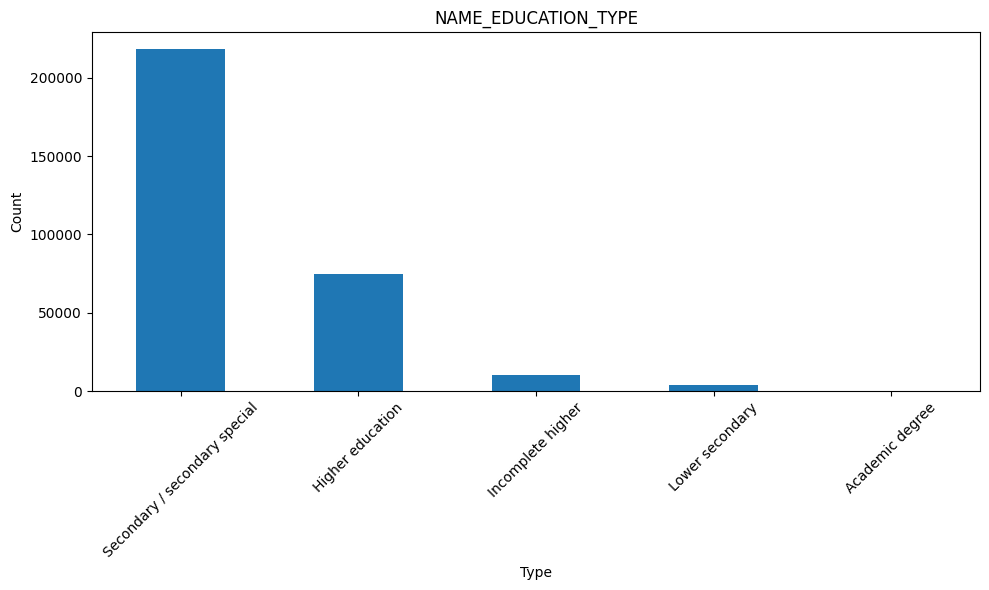

In [37]:
#NAME_EDUCATION_TYPE 最高學歷
file_path = 'application_train.csv'
data = pd.read_csv(file_path)

name_income_type = data['NAME_EDUCATION_TYPE']

income_type_counts = name_income_type.value_counts()

plt.figure(figsize=(10, 6))
income_type_counts.plot(kind='bar')
plt.title('NAME_EDUCATION_TYPE')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

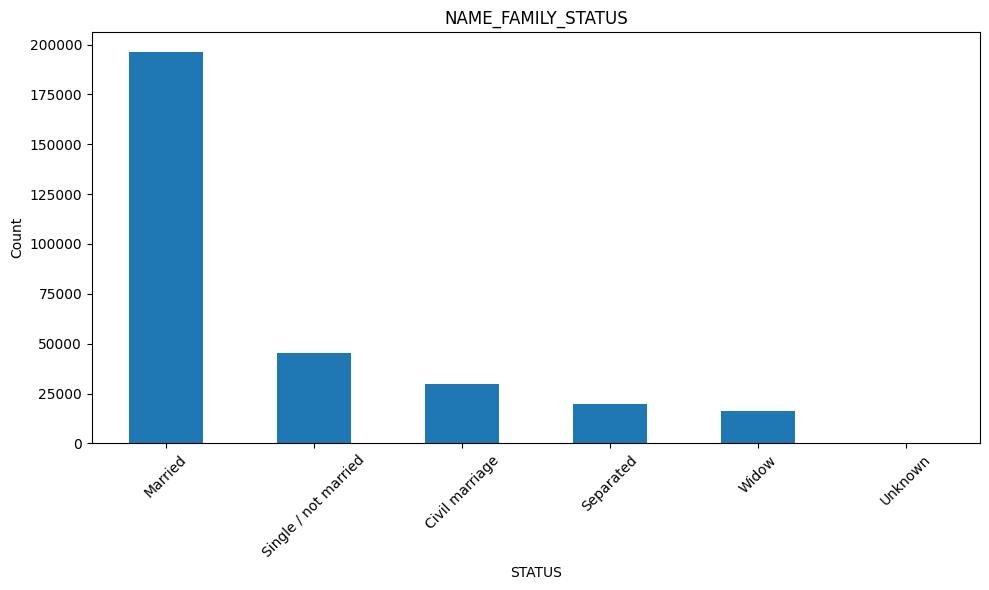

In [39]:
#NAME_FAMILY_STATUS 婚姻狀態
file_path = 'application_train.csv'
data = pd.read_csv(file_path)

name_income_type = data['NAME_FAMILY_STATUS']

income_type_counts = name_income_type.value_counts()

plt.figure(figsize=(10, 6))
income_type_counts.plot(kind='bar')
plt.title('NAME_FAMILY_STATUS')
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 檢查SK_ID_CURR是否Previous=test + train

In [1]:
import pandas as pd

# 讀取 previous_application.csv 的 SK_ID_CURR 列
df_previous = pd.read_csv("previous_application.csv", usecols=['SK_ID_CURR'])

# 讀取 application_test.csv 和 application_train.csv 的 SK_ID_CURR 列
df_test = pd.read_csv("application_test.csv", usecols=['SK_ID_CURR'])
df_train = pd.read_csv("application_train.csv", usecols=['SK_ID_CURR'])

# 合併 application_test.csv 和 application_train.csv 的 SK_ID_CURR 列
merged_id_curr = pd.concat([df_test['SK_ID_CURR'], df_train['SK_ID_CURR']], ignore_index=True)

# 比較兩個 DataFrame 的 SK_ID_CURR 列是否有不相似之處
differences = df_previous[~df_previous['SK_ID_CURR'].isin(merged_id_curr)]

# 印出比對結果
print(differences)

Empty DataFrame
Columns: [SK_ID_CURR]
Index: []


# Feature Importance(使用Random forest)

In [42]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

# from sklearn import preprocessing
# # Supress unnecessary warnings so that presentation looks clean
# import warnings
# warnings.filterwarnings("ignore")

# # Print all rows and columns
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [43]:
import os
print(os.listdir("input"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [44]:
application_train = pd.read_csv('input/application_train.csv')
POS_CASH_balance = pd.read_csv('input/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('input/bureau_balance.csv')
previous_application = pd.read_csv('input/previous_application.csv')
installments_payments = pd.read_csv('input/installments_payments.csv')
credit_card_balance = pd.read_csv('input/credit_card_balance.csv')
bureau = pd.read_csv('input/bureau.csv')
application_test = pd.read_csv('input/application_test.csv')

In [45]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [46]:
from sklearn import preprocessing
categorical_feats = [
    f for f in application_train.columns if application_train[f].dtype == 'object'
]

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(application_train[col].values.astype('str')) + list(application_test[col].values.astype('str')))
    application_train[col] = lb.transform(list(application_train[col].values.astype('str')))
    application_test[col] = lb.transform(list(application_test[col].values.astype('str')))

In [47]:
application_train.fillna(-999, inplace = True)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(application_train.drop(['SK_ID_CURR', 'TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
'FLAG_PHONE'],axis=1), application_train.TARGET)
features = application_train.drop(['SK_ID_CURR', 'TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
'FLAG_PHONE'],axis=1).columns.values

In [49]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

# Reference

In [40]:
# Find correlations with the target and sort
correlations_2 = data.corr()['TARGET'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', correlations_2.tail(15))
print('\nMost Negative Correlations:\n', correlations_2.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


Text(0.5, 1.0, 'Correlation between features')

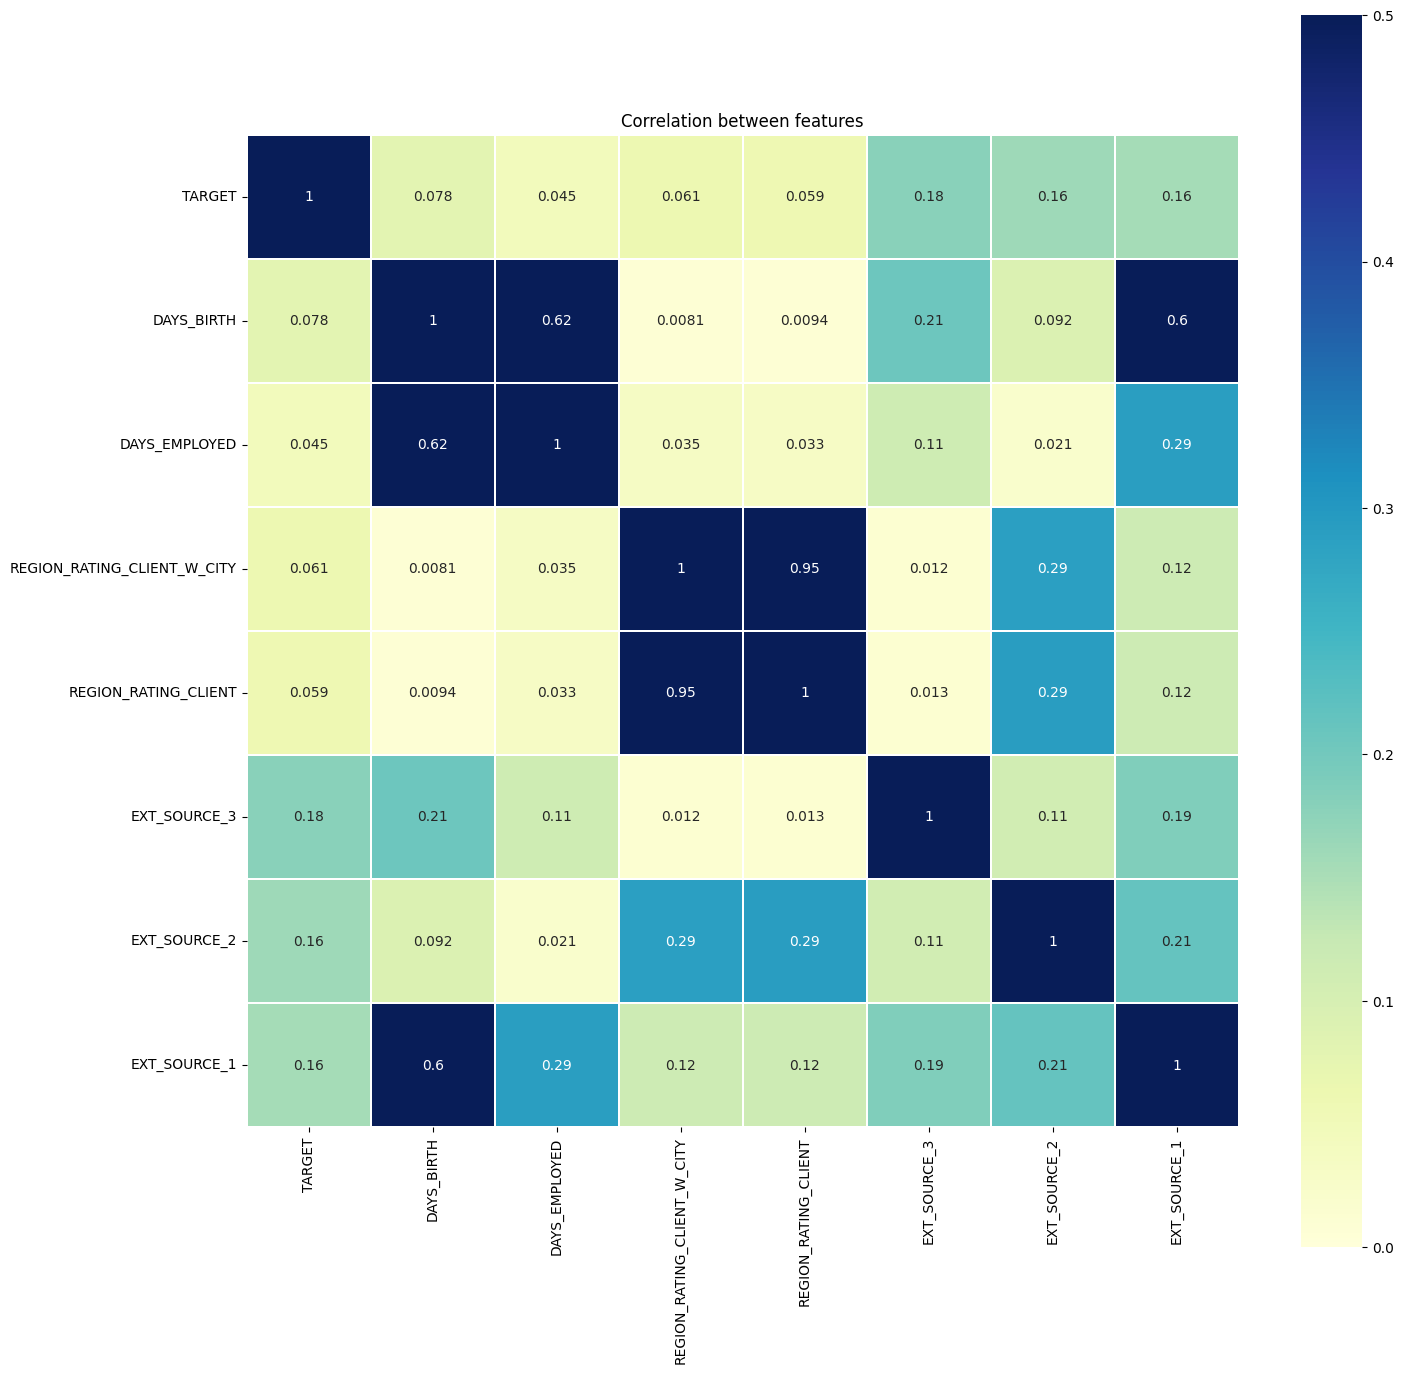

In [41]:
ext_data = data[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]
correlations = ext_data.corr()
plt.figure(figsize=(16, 16))

sns.heatmap(np.abs(correlations), vmin=0, vmax=0.5, linewidths=0.05,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

# ◎EDA

In [11]:
#基本模块
import numpy as np
import pandas as pd
#画图模块
import matplotlib.pyplot as plt
import seaborn as sns 
#忽略wainings 
import warnings
warnings.filterwarnings('ignore')
#图表显示设置
%matplotlib inline
# 使用自带的样式进行美化
plt.style.use("ggplot")
#清理内存
import gc

In [12]:
df_train = pd.read_csv('application_train.csv')

# <1>Target V.S  DAYS_BIRTH年齡分布

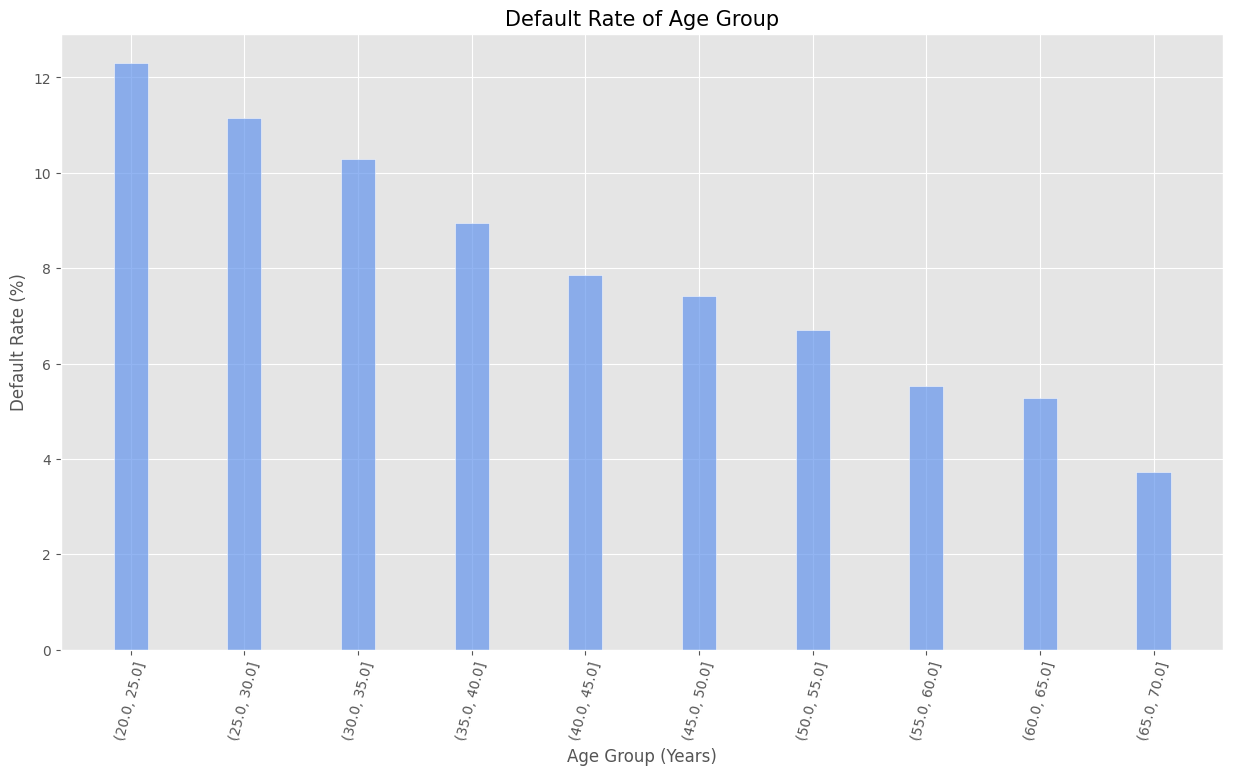

In [13]:
age = df_train[['DAYS_BIRTH', 'TARGET']]
age['YEARS_BIRTH'] = age['DAYS_BIRTH'] / -365
age['YEARS_BINNED'] = pd.cut(age['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_groups = age.groupby('YEARS_BINNED').mean()
#作图
plt.figure(figsize = (15, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color = 'cornflowerblue', width = 0.3, alpha = 0.7, edgecolor = 'w')
plt.title('Default Rate of Age Group',fontsize = 15)
plt.xlabel('Age Group (Years)',fontsize = 12)
plt.ylabel('Default Rate (%)',fontsize = 12)
plt.xticks(rotation = 75)
plt.show()

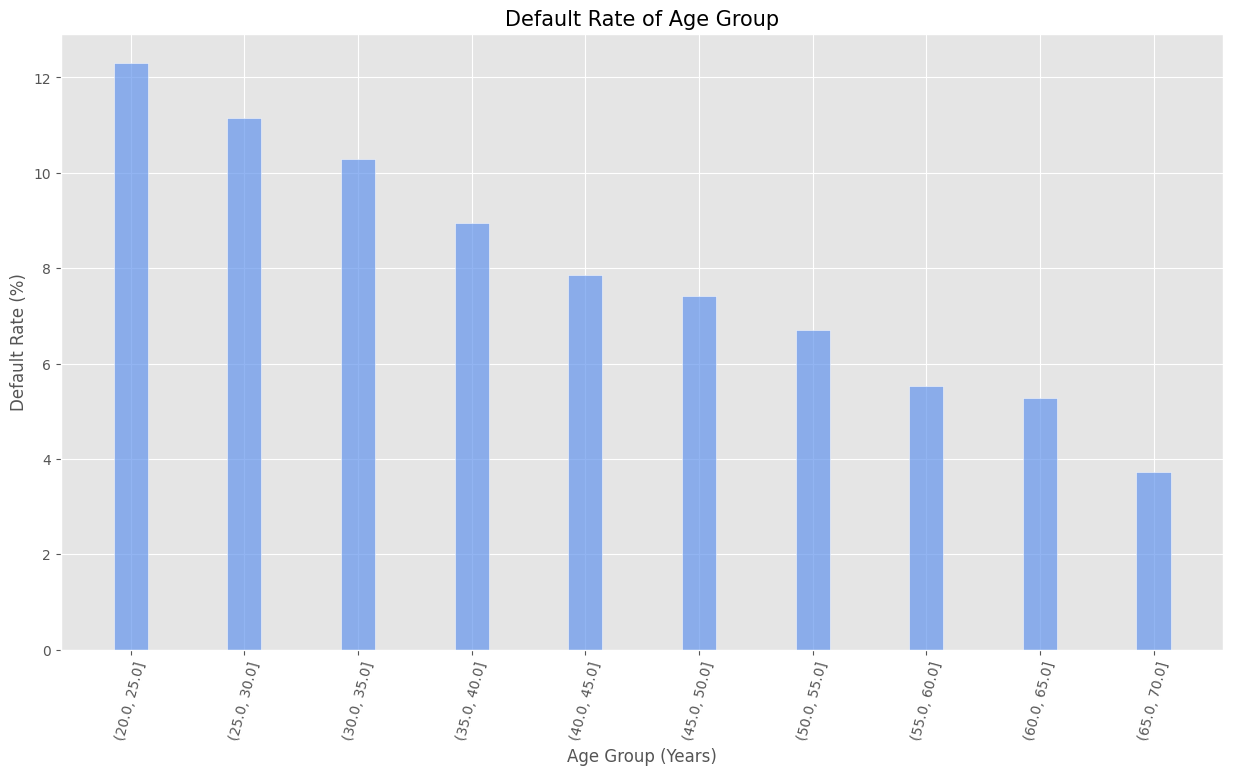

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 假设你的数据集 df_train 已经准备好

age = df_train[['DAYS_BIRTH', 'TARGET']]
age['YEARS_BIRTH'] = age['DAYS_BIRTH'] / -365
age['YEARS_BINNED'] = pd.cut(age['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_groups = age.groupby('YEARS_BINNED').mean()

# 作图
plt.figure(figsize=(15, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color='cornflowerblue', width=0.3, alpha=0.7, edgecolor='w')
plt.title('Default Rate of Age Group', fontsize=15)
plt.xlabel('Age Group (Years)', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.xticks(rotation=75)

# 保存图为 PNG 文件
plt.savefig('age_default_rate.png')

# 显示图
plt.show()

# <2>Target V.S OCCUPATION_TYPE職業類型

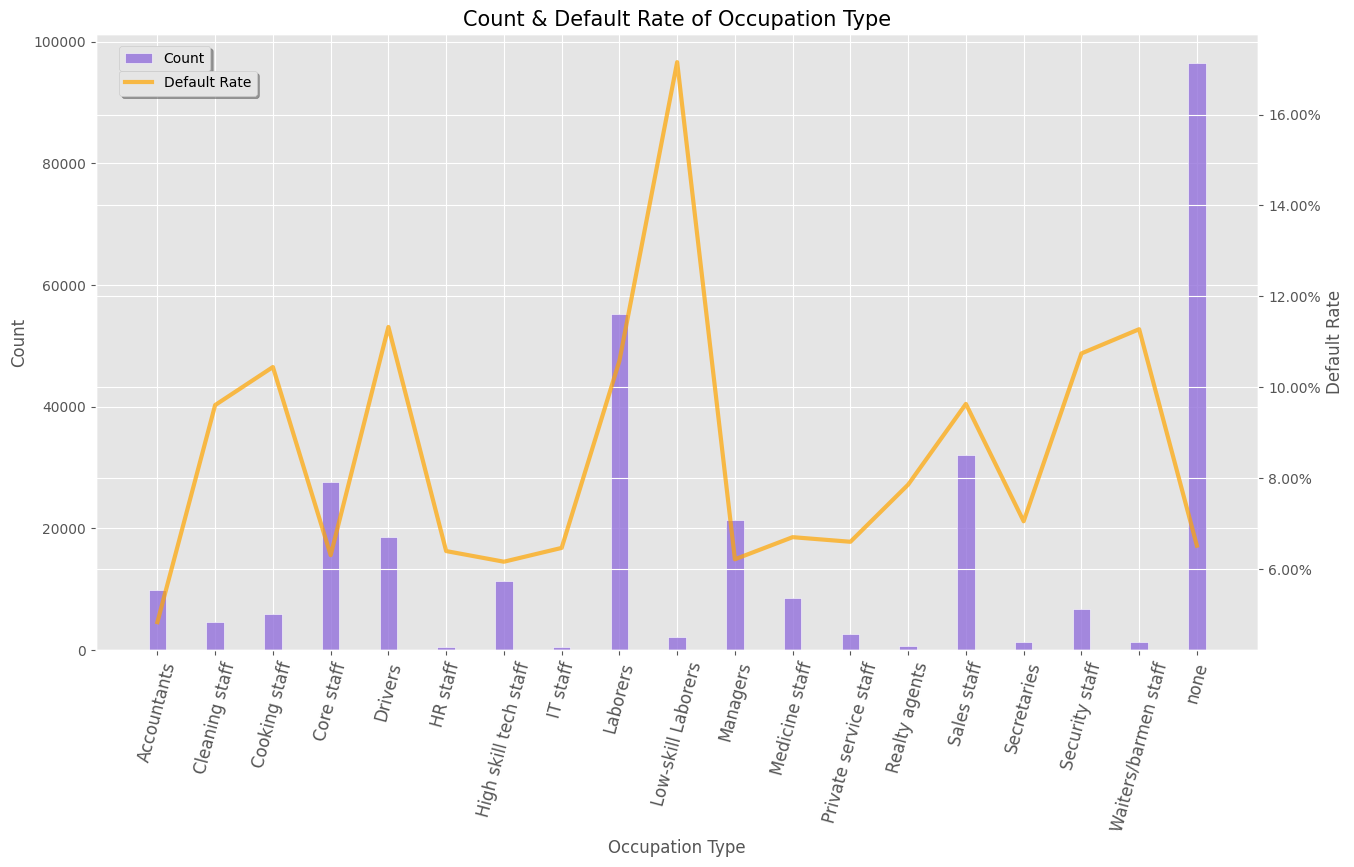

In [15]:
#（OCCUPATION_TYPE）
tem = df_train.loc[:, ['OCCUPATION_TYPE', 'TARGET']]
tem.fillna('none', inplace = True)
#tem1表示各个职位中逾期的人数
tem1 = tem.groupby('OCCUPATION_TYPE').sum( )
#tem2表示各个职业的总人数
tem2 = tem.groupby('OCCUPATION_TYPE').count( )
#tem3表示各个职位逾期比率
tem3 =  tem1 / tem2 * 100
tem3.reset_index(inplace = True)
tem2.reset_index(inplace = True)
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(111)
#Count
ax1.bar('OCCUPATION_TYPE', 'TARGET', data = tem2, width = 0.3, edgecolor = 'w', label = 'Count', color = 'mediumpurple', alpha = 0.8)
plt.xlabel('Occupation Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 75, fontsize = 12)
#设置双坐标轴，右侧Y轴
ax2 = ax1.twinx( )
#设置右侧Y轴显示百分数
import matplotlib.ticker as mtick
fmt = '%0.2f%%'
yticks = mtick.FormatStrFormatter(fmt)
#Default Rate
ax2.plot(tem3['OCCUPATION_TYPE'], tem3['TARGET'], label = 'Default Rate', linewidth = 3, color = 'orange', alpha = 0.7)
ax2.yaxis.set_major_formatter(yticks)
ax1.set_ylabel('Count', fontsize = 12)
ax2.set_ylabel('Default Rate', fontsize = 12)
legend1 = ax1.legend(loc = (.02,.94), fontsize = 10, shadow = True)
legend2 = ax2.legend(loc = (.02,.9), fontsize = 10, shadow = True)
plt.title('Count & Default Rate of Occupation Type', fontsize = 15) 

plt.savefig('carrer_default_rate.png')

plt.show( )

# <3>Target V.S DAYS_EMPLOYED工作年資

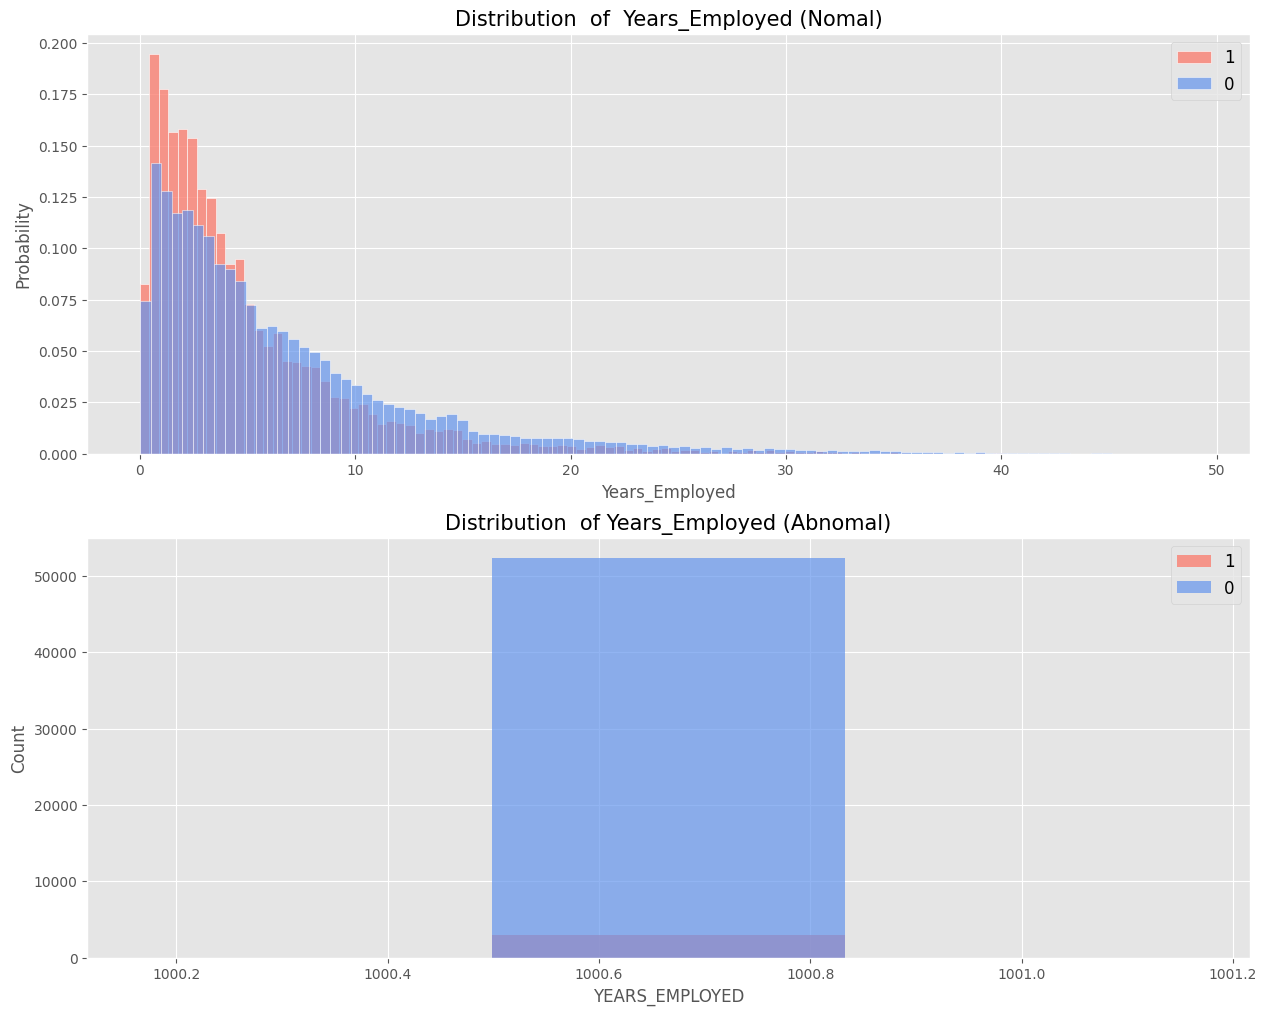

In [16]:
#（DAYS_EMPLOYED）
tem = df_train.loc[:, ['DAYS_EMPLOYED', 'TARGET']]
#发现异常值DAYS_EMPLOYED = 365243，取出单独分析
tem1 = tem[tem['TARGET'] == 1]['DAYS_EMPLOYED']
tem1_norm = tem1[tem1 != 365243] / -365
tem1_a_norm = tem1[tem1 == 365243] / 365
tem0 = tem[tem['TARGET'] == 0]['DAYS_EMPLOYED']
tem0_norm = tem0[tem0 != 365243] / -365
tem0_a_norm = tem0[tem0 == 365243] / 365
fig, ax = plt.subplots(2, 1, figsize = (15, 12))
#Nomal
ax[0].hist(tem1_norm.values, bins = 100, label = '1', density = True, alpha = 0.8, color = 'salmon', edgecolor = 'w')
ax[0].hist(tem0_norm.values, bins = 100, label = '0', density = True, alpha = 0.7, color = 'cornflowerblue', edgecolor = 'w')
ax[0].set_title('Distribution  of  Years_Employed (Nomal)', fontsize = 15)
ax[0].set_xlabel('Years_Employed', fontsize = 12)
ax[0].set_ylabel('Probability', fontsize = 12)
ax[0].legend(fontsize = 'large')
#Abnomal
ax[1].hist(tem1_a_norm.values, bins = 3, label = '1',density = False, alpha = 0.8, color = 'salmon')
ax[1].hist(tem0_a_norm.values, bins = 3, label = '0',density = False, alpha = 0.7, color = 'cornflowerblue')
ax[1].set_title('Distribution  of Years_Employed (Abnomal)', fontsize = 15)
ax[1].set_xlabel('YEARS_EMPLOYED', fontsize = 12)
ax[1].set_ylabel('Count', fontsize = 12)
ax[1].legend(fontsize = 'large')

plt.savefig('DAYS_EMPLOYED_Default Rate.png')

plt.show()

# <4>Target V.S AMT_INCOME_TOTAL月收入

In [18]:
tem = df_train.loc[:, ['AMT_INCOME_TOTAL','TARGET']]
tem.describe()

AMT_INCOME_TOTAL         TARGET
count      3.075110e+05  307511.000000
mean       1.687979e+05       0.080729
std        2.371231e+05       0.272419
min        2.565000e+04       0.000000
25%        1.125000e+05       0.000000
50%        1.471500e+05       0.000000
75%        2.025000e+05       0.000000
max        1.170000e+08       1.000000

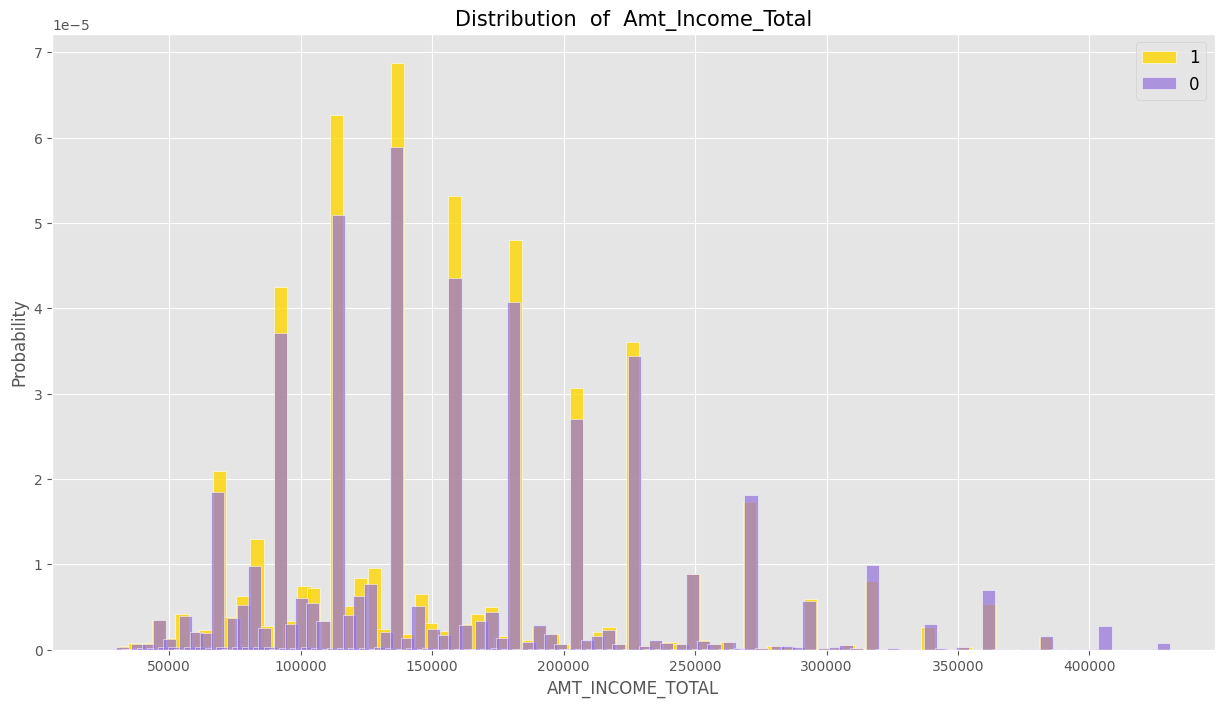

In [19]:
#tem1表示逾期客户的年总收入，tem0表示正常客户的年总收入
tem1 = tem[tem['TARGET'] == 1]['AMT_INCOME_TOTAL']
tem0 = tem[tem['TARGET'] == 0]['AMT_INCOME_TOTAL']
#分别取逾期和正常客户年总收入的前98%数据
tem1_98 = tem1[tem1<= np.percentile(tem1, 98)]
tem0_98 = tem0[tem0<= np.percentile(tem0, 98)]
fig, ax = plt.subplots(figsize = (15, 8), sharex = True)
plt.hist(tem1_98.values, bins = 200, label = '1', density = True, width = 5000, alpha = 0.8, color = 'gold', edgecolor = 'w')
plt.hist(tem0_98.values, bins = 200, label = '0', density = True, width = 5000, alpha = 0.7, color = 'mediumpurple', edgecolor = 'w')
plt.title('Distribution  of  Amt_Income_Total', fontsize = 15)
plt.xlabel('AMT_INCOME_TOTAL', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.legend(fontsize = 'large')

plt.savefig('AMT_INCOME_TOTAL_Default Rate.png')

plt.show()

# <5>Target V.S AMT_CREDIT/AMT_INCOME_TOTAL 負債Ratio

In [20]:
tem = df_train.loc[:, ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'TARGET'] ]
#贷款占總收入的比率
tem['CreditToIncomeRatio'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
tem.describe()

AMT_CREDIT  AMT_INCOME_TOTAL         TARGET  CreditToIncomeRatio
count  3.075110e+05      3.075110e+05  307511.000000        307511.000000
mean   5.990260e+05      1.687979e+05       0.080729             3.957570
std    4.024908e+05      2.371231e+05       0.272419             2.689728
min    4.500000e+04      2.565000e+04       0.000000             0.004808
25%    2.700000e+05      1.125000e+05       0.000000             2.018667
50%    5.135310e+05      1.471500e+05       0.000000             3.265067
75%    8.086500e+05      2.025000e+05       0.000000             5.159880
max    4.050000e+06      1.170000e+08       1.000000            84.736842

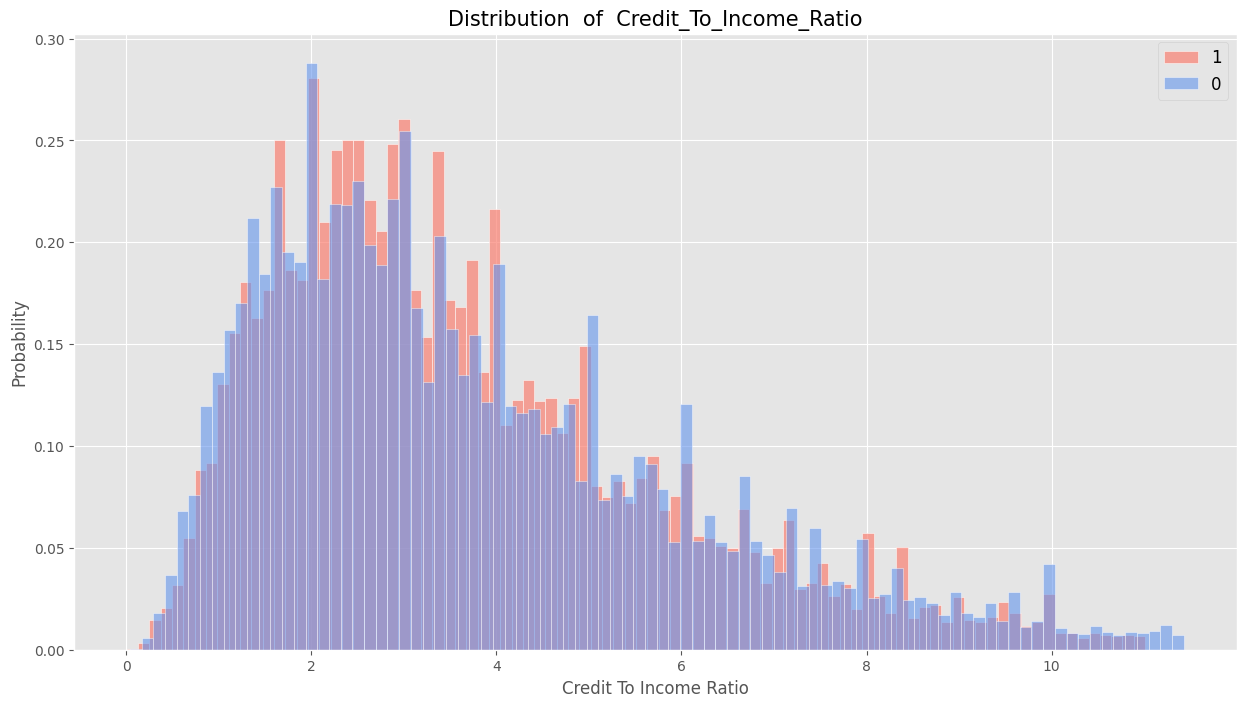

In [21]:
tem1 = tem[tem['TARGET'] == 1]['CreditToIncomeRatio']
tem0 = tem[tem['TARGET'] == 0]['CreditToIncomeRatio']
#分别取逾期和正常客户年债務收入比的前98%數據
tem1_98 = tem1[tem1 <= np.percentile(tem1, 98)]
tem0_98 = tem0[tem0 <= np.percentile(tem0, 98)]
fig, ax = plt.subplots(figsize =(15, 8), sharex = True)
plt.hist(tem1_98.values, bins = 90, label = '1', density = True, alpha = 0.7, color = 'salmon', edgecolor = 'w')
plt.hist(tem0_98.values, bins = 90, label = '0', density = True, alpha = 0.6, color = 'cornflowerblue', edgecolor = 'w')
plt.title('Distribution  of  Credit_To_Income_Ratio', fontsize = 15)
plt.xlabel('Credit To Income Ratio', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.legend(fontsize = 'large')

plt.savefig('credit_to_income_ratio_distribution.png')

plt.show()

# <6>Target V.S SK_ID_CURR & SK_ID_PREV(from Previous) 歷史借款次數

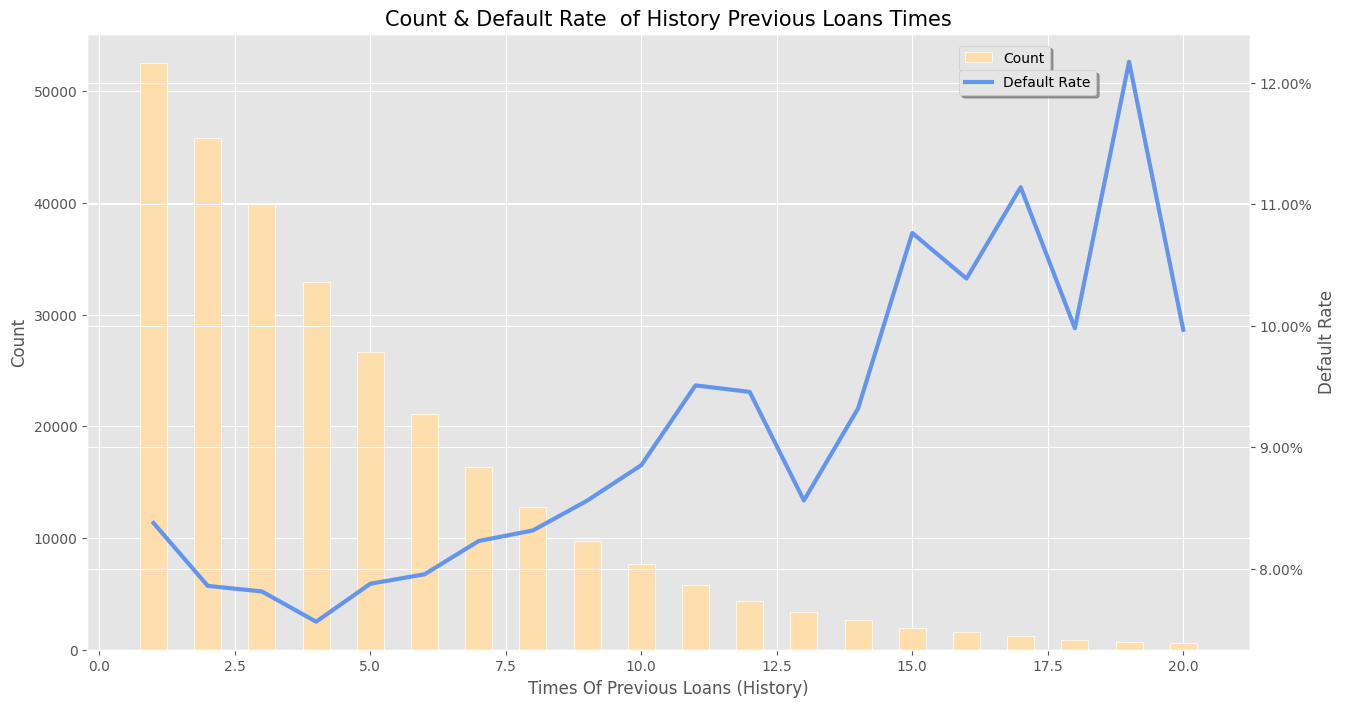

In [22]:
#导入历史申请表
pa = pd.read_csv('previous_application.csv')
tem = pa.loc[:, ['SK_ID_CURR', 'SK_ID_PREV']]
tem = tem.groupby(['SK_ID_CURR']).count().reset_index()
tem = df_train.loc[:, ['SK_ID_CURR','TARGET']].merge(tem, how = 'left', on = 'SK_ID_CURR')
tem = tem.loc[:, ['SK_ID_PREV','TARGET']]
#tem1表示各个借款次数下的总人数
tem1 = tem.groupby('SK_ID_PREV').count()
#tem2表示各个借款次数下的违约总人数
tem2 = tem.groupby('SK_ID_PREV').sum()
#f3表示各个借款次数下的违约率
tem3 = tem2 / tem1 * 100
tem3.reset_index(inplace = True)
tem1.reset_index(inplace = True)
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(111)
#由于次数大于20的人数较少且毁约率波动很大，只选取小于20的贷款次数进行作图
ax1.bar('SK_ID_PREV', 'TARGET', width = 0.5, data = tem1[tem1['SK_ID_PREV'] < 21], 
        edgecolor = 'w', label = 'Count', color = 'navajowhite')
plt.xlabel('Times Of Previous Loans (History)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
#设置双坐标轴，右侧Y轴
ax2 = ax1.twinx( )
#设置右侧Y轴显示百分数
import matplotlib.ticker as mtick
fmt = '%0.2f%%'
yticks = mtick.FormatStrFormatter(fmt)
#Default Rate
ax2.plot(tem3[tem3['SK_ID_PREV'] < 21]['SK_ID_PREV'], tem3[tem3['SK_ID_PREV'] < 21]['TARGET'], 
         label = 'Default Rate', linewidth = 3, color = 'cornflowerblue')
ax2.yaxis.set_major_formatter(yticks)
ax2.set_ylabel('Default Rate', fontsize = 12)
legend1=ax1.legend(loc=(0.75, .94), fontsize = 10, shadow = True)
legend2=ax2.legend(loc=(0.75, .9), fontsize = 10, shadow = True)
plt.title('Count & Default Rate  of History Previous Loans Times', fontsize = 15) 

fig.savefig('loan_times_default_rate.png')

plt.show( )